# MultiThreading

## Intro

In [1]:
import threading
import requests

def download_page(url):
    response = requests.get(url)
    print(f"Downloaded {url} ({len(response.content)} bytes)")

def main():
    urls = ["https://example.com", "https://google.com", "https://github.com"]

    # Create threads for each URL
    threads = []
    for url in urls:
        thread = threading.Thread(target=download_page, args=(url,))
        threads.append(thread)
        thread.start()

    # Wait for all threads to finish
    for thread in threads:
        thread.join()

main()

Downloaded https://github.com (230041 bytes)
Downloaded https://google.com (21788 bytes)
Downloaded https://example.com (1256 bytes)


In [2]:
main()

Downloaded https://github.com (230053 bytes)
Downloaded https://google.com (21769 bytes)
Downloaded https://example.com (1256 bytes)


In [6]:
import threading
import os

def task1():
    print("Task 1 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 1: {}".format(os.getpid()))
 
def task2():
    print("Task 2 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 2: {}".format(os.getpid()))
 
def main():
 
    print("ID of process running main program: {}".format(os.getpid()))
 
    print("Main thread name: {}".format(threading.current_thread().name))
 
    t1 = threading.Thread(target=task1, name='t1')
    t2 = threading.Thread(target=task2, name='t2')
 
    t1.start()
    t2.start()
 
    t1.join()
    t2.join()

main()

ID of process running main program: 8668
Main thread name: MainThread
Task 1 assigned to thread: t1
ID of process running task 1: 8668
Task 2 assigned to thread: t2
ID of process running task 2: 8668


In [8]:
from concurrent.futures import ThreadPoolExecutor
import threading
import os
import pandas as pd

print("Main thread {} running".format(threading.current_thread().name))

def worker():
    print("Worker thread {} running".format(threading.current_thread().name))
    print("ID of process running task 2: {}".format(os.getpid()))
    
    print("Worker thread {} start loading csv file".format(threading.current_thread().name))
    pd.read_csv("/home/phinguyen/ETL_Pipeline_with_Spark_01/sample_data/Product.csv")

pool = ThreadPoolExecutor(max_workers=2)

pool.submit(worker)
pool.submit(worker)
 
pool.shutdown(wait=True)
 
print("Main thread {} running".format(threading.current_thread().name))
print("ID of process running task 2: {}".format(os.getpid()))

Main thread MainThread running
Worker thread ThreadPoolExecutor-1_0 running
ID of process running task 2: 8668
Worker thread ThreadPoolExecutor-1_0 start loading csv file
Worker thread ThreadPoolExecutor-1_1 running
ID of process running task 2: 8668
Worker thread ThreadPoolExecutor-1_1 start loading csv file
Main thread MainThread running
ID of process running task 2: 8668


## Multithreading Synchronization
Thread synchronization is defined as a mechanism which ensures that two or more concurrent threads do not simultaneously execute some particular program segment known as critical section.

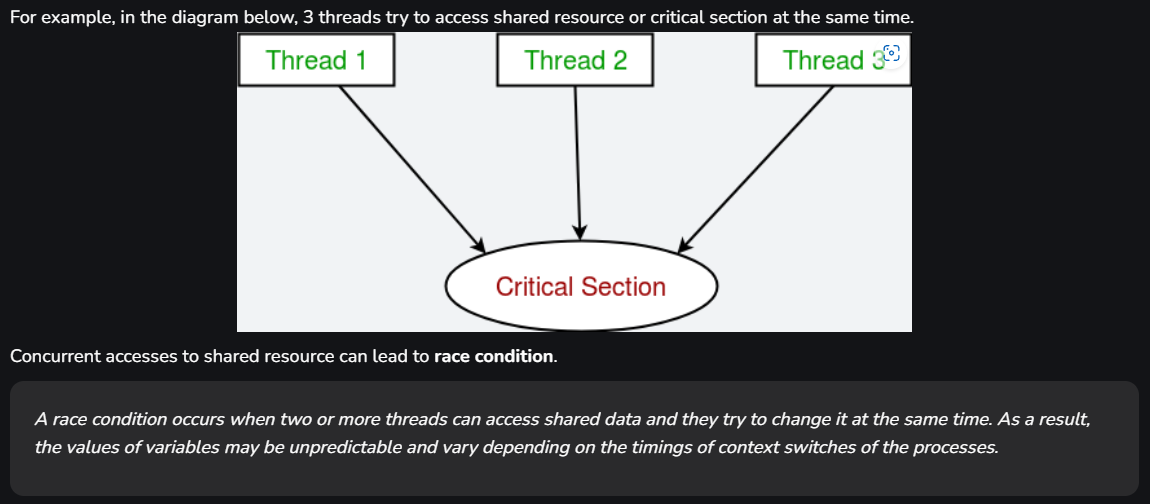

### Race condition: 2 or more threads trying to modify the shared data at the same time

In [12]:
import os
os.getcwd()

'/home/phinguyen/ETL_Pipeline_with_Spark_01/notebooks'

In [13]:
os.chdir(path='/home/phinguyen/ETL_Pipeline_with_Spark_01')

In [18]:
import threading
import pandas as pd

x = 0 # global variable

def increment():
    global x
    df = pd.read_csv("sample_data/Product.csv") # I/O
    x += 1 # CPU
    print(f"x is modify to {x} by {threading.current_thread().name}")

def thread_task():
    for i in range(5):
        print(f"Thread {threading.current_thread().name} is operating {i} increment")
        increment()

def main_task():
    global x
    x = 0
    
    t1 = threading.Thread(name="Thread-1", target=thread_task)
    t2 = threading.Thread(name="Thread-2", target=thread_task)
    
    t1.start()
    t2.start()
    
    # wait until threads finish their job 
    t1.join() 
    t2.join()

def main():
    for i in range(3): 
        main_task() 
        print("Iteration {0}: x = {1}".format(i,x))

main()

Thread Thread-1 is operating 0 increment
Thread Thread-2 is operating 0 increment
x is modify to 1 by Thread-1
Thread Thread-1 is operating 1 increment
x is modify to 2 by Thread-2
Thread Thread-2 is operating 1 increment
x is modify to 3 by Thread-1
Thread Thread-1 is operating 2 increment
x is modify to 4 by Thread-2
Thread Thread-2 is operating 2 increment
x is modify to 5 by Thread-1
Thread Thread-1 is operating 3 increment
x is modify to 6 by Thread-2
Thread Thread-2 is operating 3 increment
x is modify to 7 by Thread-1
Thread Thread-1 is operating 4 increment
x is modify to 8 by Thread-2
Thread Thread-2 is operating 4 increment
x is modify to 9 by Thread-1
x is modify to 10 by Thread-2
Iteration 0: x = 10
Thread Thread-1 is operating 0 increment
Thread Thread-2 is operating 0 increment
x is modify to 1 by Thread-1
Thread Thread-1 is operating 1 increment
x is modify to 2 by Thread-2
Thread Thread-2 is operating 1 increment
x is modify to 3 by Thread-2
Thread Thread-2 is operating

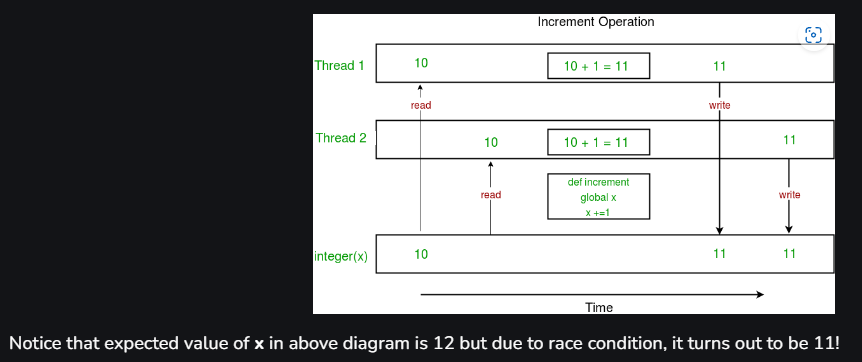

In [10]:
import threading 

# global variable x 
x = 0

def increment(): 
	""" 
	function to increment global variable x 
	"""
	global x 
	temp = x 
	temp += 1
	x = temp

def thread_task(): 
	""" 
	task for thread 
	calls increment function 100000 times. 
	"""
	for _ in range(100000): 
		increment() 

def main_task(): 
	global x 
	# setting global variable x as 0 
	x = 0

	# creating threads 
	t1 = threading.Thread(target=thread_task) 
	t2 = threading.Thread(target=thread_task) 

	# start threads 
	t1.start() 
	t2.start() 

	# wait until threads finish their job 
	t1.join() 
	t2.join() 

def main():
	for i in range(10): 
		main_task() 
		print("Iteration {0}: x = {1}".format(i,x))

main()


Iteration 0: x = 200000
Iteration 1: x = 200000
Iteration 2: x = 200000
Iteration 3: x = 200000
Iteration 4: x = 200000
Iteration 5: x = 200000
Iteration 6: x = 200000
Iteration 7: x = 200000
Iteration 8: x = 200000
Iteration 9: x = 200000


In [21]:
import threading
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

x = 0 # global variable

def increment():
    global x
    df = pd.read_csv("sample_data/Product.csv") # I/O
    x += 1 # CPU
    print(f"x is modify to {x} by {threading.current_thread().name}")

def thread_task(a, b):
    print(a + b)
    print(f"Launch job on thread {threading.current_thread().name}")
    for i in range(5):
        print(f"Thread {threading.current_thread().name} is operating {i} increment")
        increment()

def main_task():
    global x
    x = 0
    
    pool = ThreadPoolExecutor(max_workers=2)
    for i in range(2):
        pool.submit(thread_task, 2, 3)
    
    pool.shutdown(wait=True)

def main():
    for i in range(3): 
        main_task() 
        print("Iteration {0}: x = {1}".format(i,x))

main()

5
Launch job on thread ThreadPoolExecutor-8_0
Thread ThreadPoolExecutor-8_0 is operating 0 increment
5
Launch job on thread ThreadPoolExecutor-8_1
Thread ThreadPoolExecutor-8_1 is operating 0 increment
x is modify to 1 by ThreadPoolExecutor-8_1
Thread ThreadPoolExecutor-8_1 is operating 1 increment
x is modify to 2 by ThreadPoolExecutor-8_0
Thread ThreadPoolExecutor-8_0 is operating 1 increment
x is modify to 3 by ThreadPoolExecutor-8_0
Thread ThreadPoolExecutor-8_0 is operating 2 increment
x is modify to 4 by ThreadPoolExecutor-8_1
Thread ThreadPoolExecutor-8_1 is operating 2 increment
x is modify to 5 by ThreadPoolExecutor-8_0
Thread ThreadPoolExecutor-8_0 is operating 3 increment
x is modify to 6 by ThreadPoolExecutor-8_1
Thread ThreadPoolExecutor-8_1 is operating 3 increment
x is modify to 7 by ThreadPoolExecutor-8_1
Thread ThreadPoolExecutor-8_1 is operating 4 increment
x is modify to 8 by ThreadPoolExecutor-8_0
Thread ThreadPoolExecutor-8_0 is operating 4 increment
x is modify to

# Multiprocessing

In [1]:
# importing the multiprocessing module 
import multiprocessing 

def print_cube(num): 
	""" 
	function to print cube of given num 
	"""
	print("Cube: {}".format(num * num * num)) 

def print_square(num): 
	""" 
	function to print square of given num 
	"""
	print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
	# creating processes 
	p1 = multiprocessing.Process(target=print_square, args=(10, )) 
	p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

	# starting process 1 
	p1.start() 
	# starting process 2 
	p2.start() 

	# wait until process 1 is finished 
	p1.join() 
	# wait until process 2 is finished 
	p2.join() 

	# both processes finished 
	print("Done!")

Square: 100
Cube: 1000
Done!


In [2]:
# importing the multiprocessing module 
import multiprocessing 
import os 

def worker1(): 
	# printing process id 
	print("ID of process running worker1: {}".format(os.getpid())) 

def worker2(): 
	# printing process id 
	print("ID of process running worker2: {}".format(os.getpid())) 

if __name__ == "__main__": 
	# printing main program process id 
	print("ID of main process: {}".format(os.getpid())) 

	# creating processes 
	p1 = multiprocessing.Process(target=worker1) 
	p2 = multiprocessing.Process(target=worker2) 

	# starting processes 
	p1.start() 
	p2.start() 

	# process IDs 
	print("ID of process p1: {}".format(p1.pid)) 
	print("ID of process p2: {}".format(p2.pid)) 

	# wait until processes are finished 
	p1.join() 
	p2.join() 

	# both processes finished 
	print("Both processes finished execution!") 

	# check if processes are alive 
	print("Process p1 is alive: {}".format(p1.is_alive())) 
	print("Process p2 is alive: {}".format(p2.is_alive()))

ID of main process: 3632
ID of process running worker1: 10071
ID of process running worker2: 10074
ID of process p1: 10071
ID of process p2: 10074
Both processes finished execution!
Process p1 is alive: False
Process p2 is alive: False


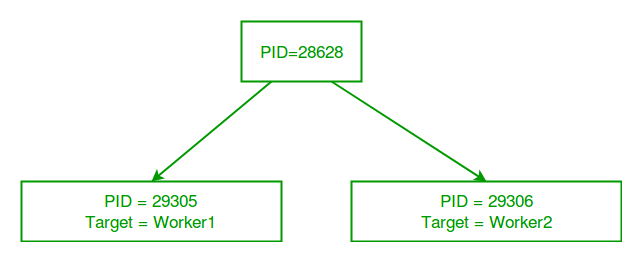

## Communication between Processes

In [3]:
import multiprocessing 

# empty list with global scope 
result = [] 

def square_list(mylist): 
	""" 
	function to square a given list 
	"""
	global result 
	# append squares of mylist to global list result 
	for num in mylist: 
		result.append(num * num) 
	# print global list result 
	print("Result(in process p1): {}".format(result)) 

if __name__ == "__main__": 
	# input list 
	mylist = [1,2,3,4] 

	# creating new process 
	p1 = multiprocessing.Process(target=square_list, args=(mylist,)) 
	# starting process 
	p1.start() 
	# wait until process is finished 
	p1.join() 

	# print global result list 
	print("Result(in main program): {}".format(result)) 

Result(in process p1): [1, 4, 9, 16]
Result(in main program): []


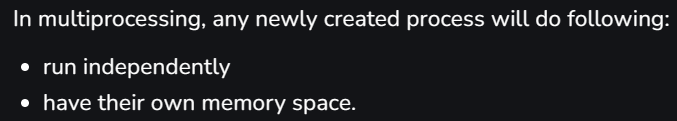

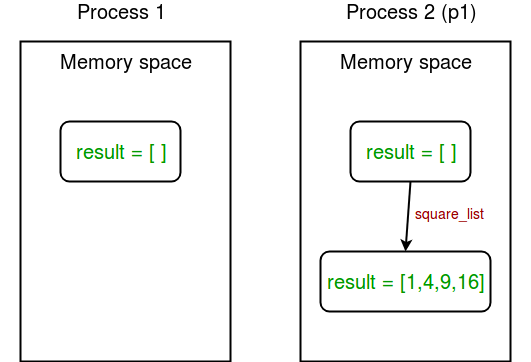

### Shared memory

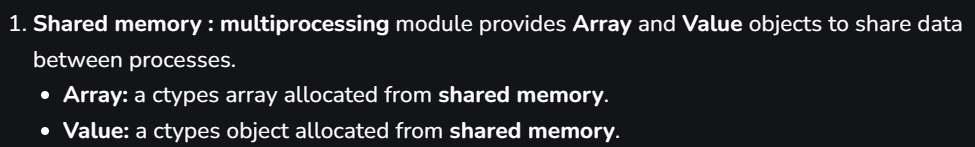

In [4]:
import multiprocessing

def square_list(mylist, result, square_sum):
	""" 
	function to square a given list 
	"""
	# append squares of mylist to result array 
	for idx, num in enumerate(mylist): 
		result[idx] = num * num 

	# square_sum value 
	square_sum.value = sum(result) 

	# print result Array 
	print("Result(in process p1): {}".format(result[:])) 

	# print square_sum Value 
	print("Sum of squares(in process p1): {}".format(square_sum.value)) 

def main():
	# input list 
	mylist = [1,2,3,4] 

	# creating Array of int data type with space for 4 integers
	result = multiprocessing.Array('i', 4) 

	# creating Value of int data type
	square_sum = multiprocessing.Value('i') 

	# creating new process 
	p1 = multiprocessing.Process(target=square_list, args=(mylist, result, square_sum)) 

	# starting process 
	p1.start() 

	# wait until the process is finished 
	p1.join() 

	# print result array 
	print("Result(in main program): {}".format(result[:])) 

	# print square_sum Value 
	print("Sum of squares(in main program): {}".format(square_sum.value))

main()

Result(in process p1): [1, 4, 9, 16]
Sum of squares(in process p1): 30
Result(in main program): [1, 4, 9, 16]
Sum of squares(in main program): 30


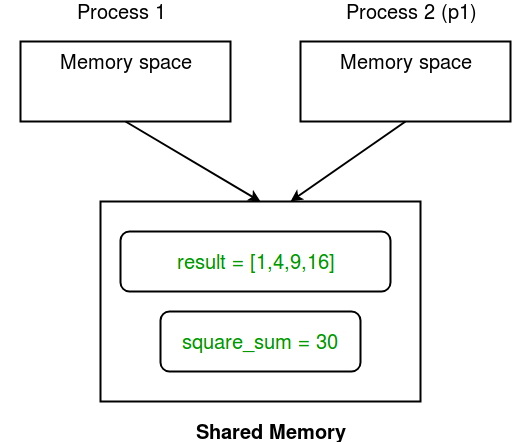

### Server process
Server process start with the Python program

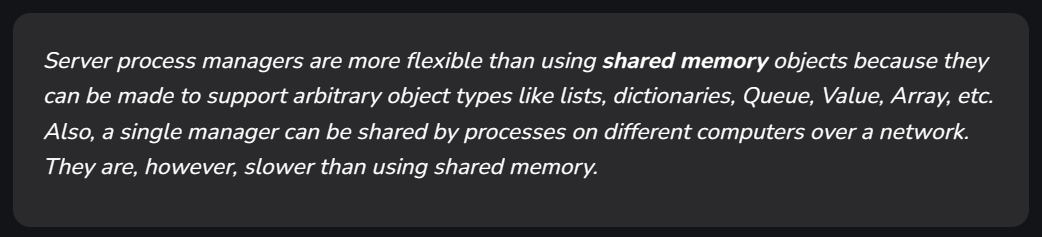

In [6]:
import multiprocessing
import os

def print_records(records): 
	""" 
	function to print record(tuples) in records(list) 
	"""
	print(f"Printing records is doing by process {os.getpid()}\n")
	for record in records: 
		print("Name: {0}\nScore: {1}\n".format(record[0], record[1])) 

def insert_record(record, records): 
	""" 
	function to add a new record to records(list) 
	"""
	records.append(record) 
	print(f"New record {record} added by process {os.getpid()}\n")

if __name__ == '__main__': 
	with multiprocessing.Manager() as manager: 
		# creating a list in server process memory 
		records = manager.list([('Sam', 10), ('Adam', 9), ('Kevin',9)]) 
		# new record to be inserted in records 
		new_record = ('Jeff', 8) 

		# creating new processes 
		p1 = multiprocessing.Process(target=insert_record, args=(new_record, records))
		p2 = multiprocessing.Process(target=print_records, args=(records,)) 

		# running process p1 to insert new record 
		p1.start() 
		p1.join() 

		# running process p2 to print records 
		p2.start() 
		p2.join() 

New record ('Jeff', 8) added by process 17494

Printing records is doing by process 17502

Name: Sam
Score: 10

Name: Adam
Score: 9

Name: Kevin
Score: 9

Name: Jeff
Score: 8



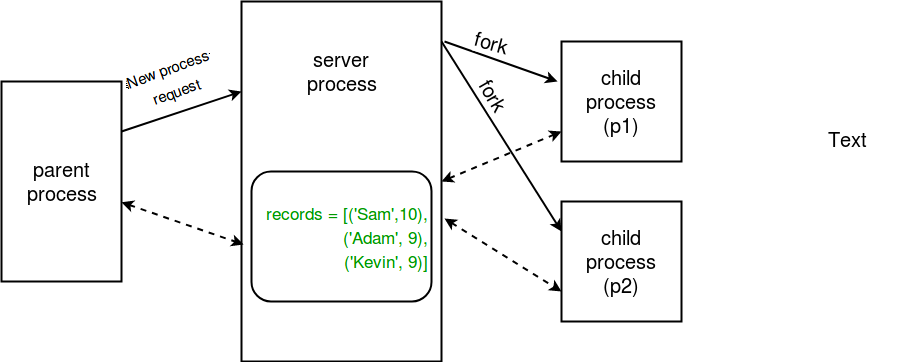

### Communication between processes

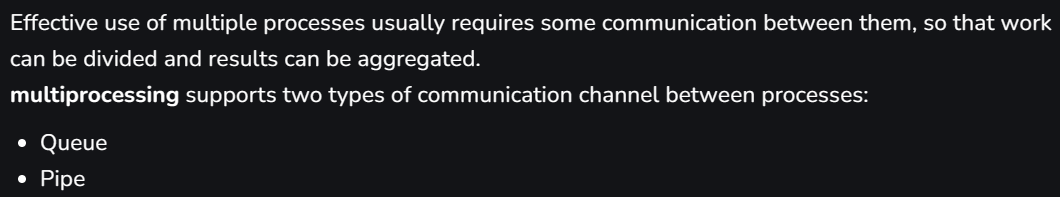

In [17]:
from typing import List
from multiprocessing import Process, Queue
import os
import time

def square_list(mylist: List, q: Queue) -> None:
    """Square elements of a list and put them into a Messages Queue"""
    print(f"Function square_list is processing by {os.getpid()}")
    for num in mylist:
        q.put(num * num)
        print(f"{num} squared is added to the queue by process {os.getpid()}")
        time.sleep(1)

def print_queue(q: Queue) -> None:
    print(f"Function print_queue is processing by {os.getpid()}")
    print("Queue elements: ")
    while not q.empty():
        print(q.get())
    print("Queue is now empty!")

# input list 
mylist = [1,2,3,4]

# creating multiprocessing.Queue instance
q = Queue()

# creating new processes
p1 = Process(target=square_list, args=(mylist, q))
p2 = Process(target=print_queue, args=(q,))

# running process p1 to square list 
p1.start() 


# running process p2 to get queue elements 
p2.start()

p1.join()
p2.join()

Function square_list is processing by 25405
1 squared is added to the queue by process 25405Function print_queue is processing by 25408

Queue elements: 


1
Queue is now empty!
2 squared is added to the queue by process 25405
3 squared is added to the queue by process 25405
4 squared is added to the queue by process 25405


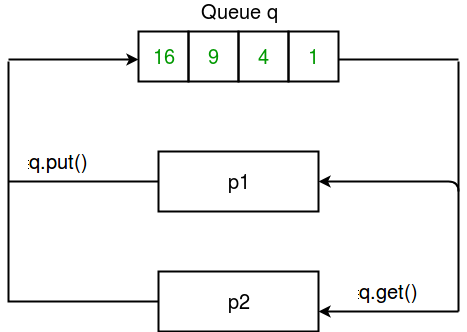

In [18]:
from multiprocessing import Process, Pipe

def sender(conn, msgs): 
	""" 
	function to send messages to other end of pipe 
	"""
	for msg in msgs: 
		conn.send(msg) 
		print("Sent the message: {}".format(msg)) 
	conn.close() 

def receiver(conn): 
	""" 
	function to print the messages received from other 
	end of pipe 
	"""
	while 1: 
		msg = conn.recv() 
		if msg == "END": 
			break
		print("Received the message: {}".format(msg)) 

if __name__ == "__main__": 
	# messages to be sent 
	msgs = ["hello", "hey", "hru?", "END"] 

	# creating a pipe 
	parent_conn, child_conn = multiprocessing.Pipe() 

	# creating new processes 
	p1 = multiprocessing.Process(target=sender, args=(parent_conn,msgs)) 
	p2 = multiprocessing.Process(target=receiver, args=(child_conn,)) 

	# running processes 
	p1.start() 
	p2.start() 

	# wait until processes finish 
	p1.join() 
	p2.join()

Sent the message: hello
Sent the message: heyReceived the message: hello

Sent the message: hru?Received the message: hey

Sent the message: ENDReceived the message: hru?



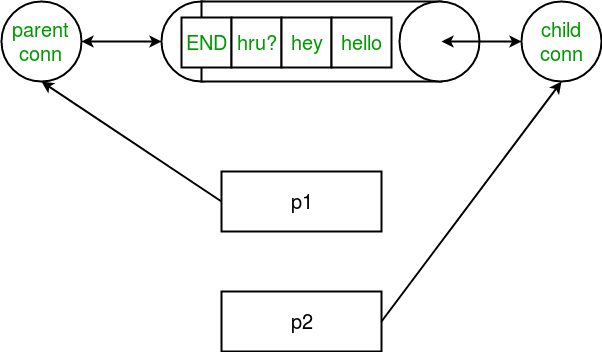

## Synchronization and Pooling of processes

### Process synchronization
Concurrent accesses to **shared resource (critical section)** can lead to **race condition**

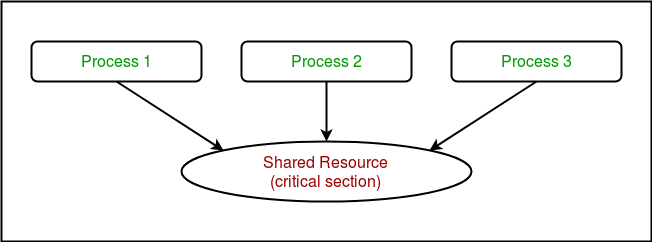

In [19]:
# Python program to illustrate 
# the concept of race condition 
# in multiprocessing 
import multiprocessing
import os

# function to withdraw from account 
def withdraw(balance):	 
	for _ in range(5):
        print(f"Process {os.getpid()} withdraw 1")
		balance.value = balance.value - 1

# function to deposit to account 
def deposit(balance):	 
	for _ in range(5):
        print(f"Process {os.getpid()} depo 1")
		balance.value = balance.value + 1

def perform_transactions(): 

	# initial balance (in shared memory) 
	balance = multiprocessing.Value('i', 0)

	# creating new processes 
	p1 = multiprocessing.Process(target=withdraw, args=(balance,)) 
	p2 = multiprocessing.Process(target=deposit, args=(balance,)) 

	# starting processes 
	p1.start() 
	p2.start() 

	# wait until processes are finished 
	p1.join() 
	p2.join() 

	# print final balance 
	print("Final balance = {}".format(balance.value)) 

if __name__ == "__main__": 
	for _ in range(10): 

		# perform same transaction process 10 times 
		perform_transactions()

Final balance = 111
Final balance = 100
Final balance = 226
Final balance = 223
Final balance = -146
Final balance = 100
Final balance = -68
Final balance = 41
Final balance = 100
Final balance = 31
